###Importing libraries


In [2]:
# Importing the pandas library.
import pandas as pd
# Importing the NumPy library.
import numpy as np
# Importing the Seaborn library
import seaborn as sns
# Importing the Matplotlib library
import matplotlib.pyplot as plt

In [3]:
# Loading our dataset from a URL.
df=pd.read_csv("http://bit.ly/FinancialDataset")
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# Describing our data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


###Data Cleaning

In [5]:
# Checking for null values.
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [6]:
# Checking for duplicated values.
df.duplicated().sum()

0

In [13]:
# Renaming columns.
df.rename(columns = {'Type of Location':'location', 'household_size': 'household','Respondent Age':'age',\
                         'Has a Bank account':'account'}, inplace = True)
df.head()

,country,year,uniqueid,account,location,Cell Phone Access,household,age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


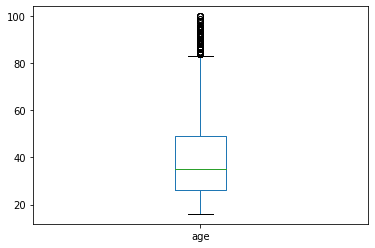

In [14]:
# Checking for outliers in our age column.
df.boxplot(column =['age'],grid = False)
# There is a significant amount of data that is showing as outliers.
# With enough domain knowledge of our data, removing that chunk of data will cause major errors in our analysis.
# So we keep it.

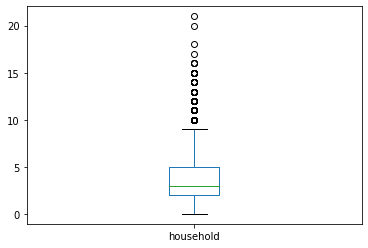

In [15]:
# Checking for outliers in our household column.
df.boxplot(column =['household'],grid = False)
# There is a significant amount of data that is showing as outliers.
# With enough domain knowledge of our data, removing that chunk of data will cause major errors in our analysis.
# So we keep it.

###Data Analysis

Research question to be answered.
The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

#Univariate Analysis

Frequency Tables

In [19]:
# Those with bank accounts
ac_freq=df.account.value_counts()
ac_freq

No     20179
Yes     3309
Name: account, dtype: int64

In [21]:
# Age frequency
age_freq=df.household.value_counts()
age_freq

2.0     5132
1.0     3967
3.0     3535
4.0     3211
5.0     2727
6.0     2031
7.0     1383
8.0      741
9.0      356
10.0     192
12.0      66
11.0      66
0.0       36
13.0      25
15.0      11
14.0       9
16.0       4
18.0       1
20.0       1
21.0       1
17.0       1
Name: household, dtype: int64

Histogram and pie chart.

In [27]:
# Creating a dataframe where all entries have a bank account.
acc = df[df.account != 'No']
#acc

<function matplotlib.pyplot.show>

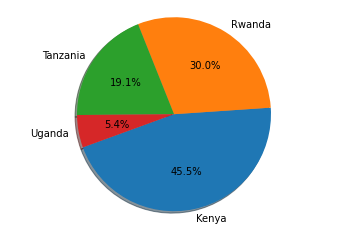

In [31]:
# Let's plot a pie chart to show the age distribution across the various countries for those with bank accounts.
location=acc.groupby(['country']).count().reset_index()
uzee=location['age']
nation=location['country']
plt.pie(uzee,labels=nation,autopct='%1.1f%%',shadow=True,startangle=200)
plt.axis('equal')
plt.show
# We can predict that Kenyans are more likely to use bank accounts.

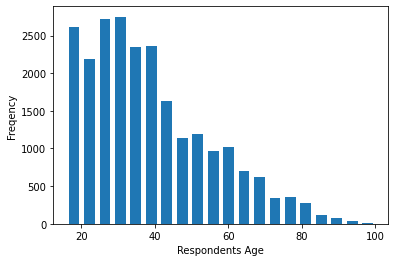

In [35]:
# Let's plot a histogram to show the distribution of the respondents' age.
age=df['age']
plt.hist(age,bins=20,histtype='bar',rwidth=0.7)
plt.xlabel('Respondents Age')
plt.ylabel('Freqency')
plt.show()
# The graph's is skewed to the right which means that mean is greater than the mode.

In [16]:
# This code helps us to prove that the results from the above histogram are correct.
# This code checks for the measures of central tendency(mean, quartiles, standard deviation, max and min values)
# in the columns that have numeric datatypes in our dataset.
df.describe()

,year,household,age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


#Bivariate Analysis


Scatterplot

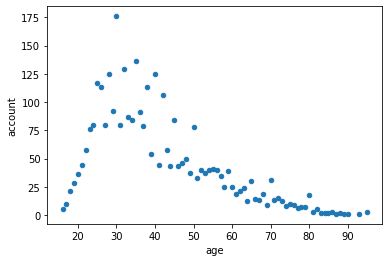

In [25]:
# Plotting a scatterplot to see how many people have accounts depending on age.
acc_df=acc.groupby('age').count().reset_index()
acc_df
acc_df.plot(x='age',y='account',kind='scatter')
# We can conclude from the scatter plot that as people grow older, the less likely
# they are to have a bank account. At 30 years, we have the most people with a bank account.
# We can now spredict that the people likely to open bank accounts rang from 20-50years.  

#Multivariate Analysis

Bar Graphs

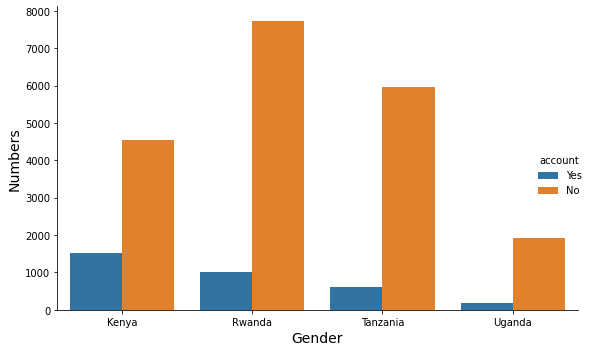

In [38]:
# Let's plot a bar graph to show how each country is performing gender-wise in regards to 
# having a bank account.
sns.catplot( x='country',
             kind="count", 
             hue="account", 
             height=5, 
             aspect=1.5, 
             data=df)
plt.xlabel("Gender", size=14)
plt.ylabel("Numbers", size=14)
plt.tight_layout()
# Our analysis shows that Kenyans are more likely to open bank accounts compared to the other countries.
# Our analysis also shows a huge gap in Rwanda and Tanzania particulary even though the others are also performing poorly.

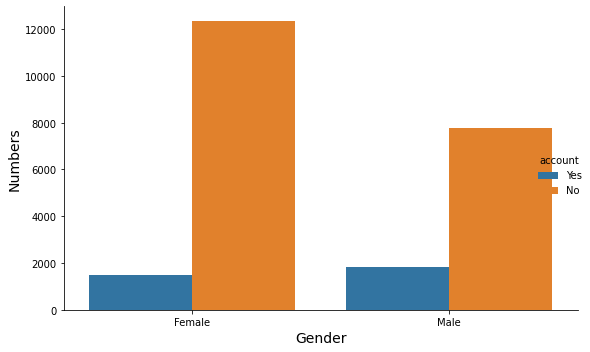

In [39]:
sns.catplot( x='gender_of_respondent',
             kind="count", 
             hue="account", 
             height=5, 
             aspect=1.5, 
             data=df)
plt.xlabel("Gender", size=14)
plt.ylabel("Numbers", size=14)
plt.tight_layout()
# This bar graph shows that overall the number of men with bank accounts across East Africa
# is almost the same as the number of females with bank accounts.
# The disparity in the population is not gender biased.


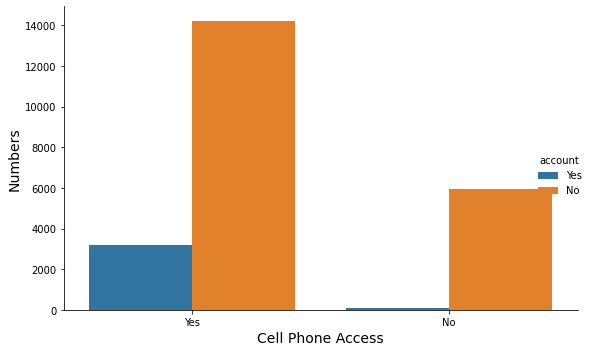

In [41]:
# Let's plot a bar graph showing how cell phone access affects the population's ability to 
# have a bank account.
sns.catplot( x='Cell Phone Access',
             kind="count", 
             hue="account", 
             height=5, 
             aspect=1.5, 
             data=df)
plt.xlabel("Cell Phone Access", size=14)
plt.ylabel("Numbers", size=14)
plt.tight_layout()
# We can conclude that the people without cell phone access are likely not open bank accounts.
# The difference is quite large here as plotted below. 
# In conclusion we can say that financial institutions should target those with cell phone access
# or at least collaborate with telecommunication companies in broadening cell phone access to the East African populace.

PCA

In [45]:
#pre-processing
#X = df.drop(columns=['country','uniqueid','account','location','Cell Phone Access','gender_of_respondent','The relathip with head','marital_status','Level of Educuation','Type of Job'],1)
#y = df['account']

SyntaxError: ignored